<a href="https://colab.research.google.com/github/azahrasalsaa/machine_learning/blob/main/Jobsheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Lab Work 1**

-----

###**K-Means Clustering**

**Step 1 - Preparation**

In [36]:
# Import Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Data
df = pd.read_csv('Iris.csv')

# Peek Data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Step 2 - Select Features and Label**

In [37]:
# Select Features
X = df.iloc[:, 1:-1] # slice features vector
y = df.iloc[:, -1] # slice data labels

**Step 3 - Visualize The Data**

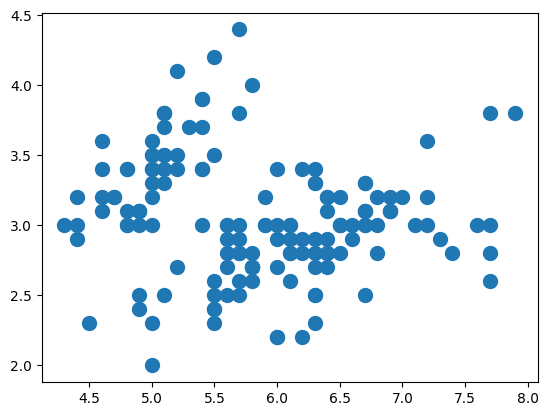

In [38]:
# Plot Data
# We have 4 dimensional feature space
# Thereofe, we only plot the cluster based on Sepal Length and Sepal Width only

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

**Step 4 - Make K-Means Model**

In [39]:
# Create K-Means Model
# In this model, we only just create a model with k = 2 even we already know the total of Iris dataset label is 3.

from sklearn.cluster import KMeans

# Instantiation K-Means Model
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

**Step 5 - Check Cluster**

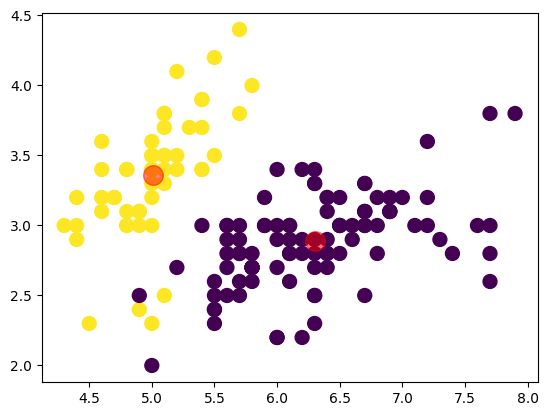

In [40]:
# Plot cluster based on Sepal Length and Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

**Step 6 - Evaluate Model**

In [41]:
# Check the value of SSE
print(f'SSE: {cl_kmeans.inertia_}')

SSE: 152.36870647733915


**Step 7 - Find The Optimum K**

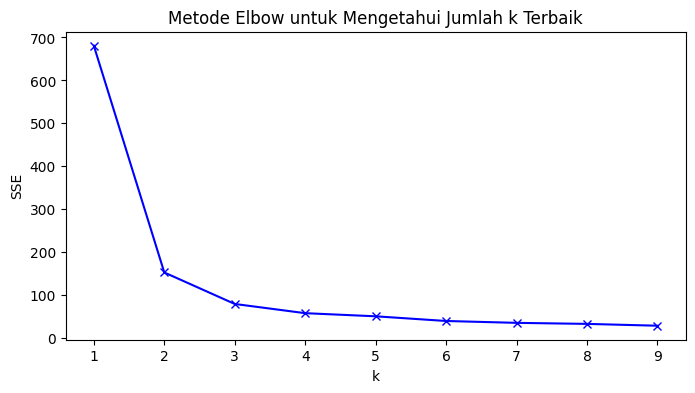

In [42]:
# Implementasi Metode Elbow

# The of SSE's values
sse = []

# Limit finding the best k from 1-10
K = range(1,10)

# Calculate SSE for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Check SSE value for each *k*

In [43]:
# Check SSE value for each k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.4732732654949
k=5; SSE=50.18952210684964
k=6; SSE=39.266821514027406
k=7; SSE=34.926495183585324
k=8; SSE=32.504192834138486
k=9; SSE=28.2385149924658


##**Lab Work 2**

-----

###**Clustering on Unstructured Data**

####**Case 1: Numerical Images**

**Step 1 - Load Data**

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

**Step 2 - Make K-Means Model**

In [45]:
# Create K-Means model
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

**Step 3 - Plot Digits Cluster**

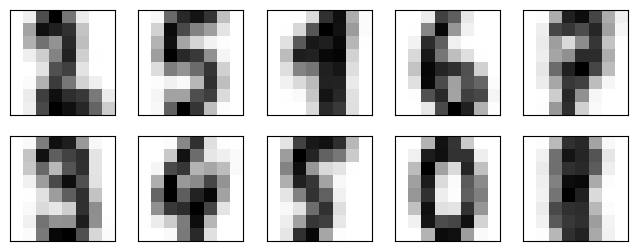

In [46]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

**Step 4 - Labeling Based on The Cluster**

In [47]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

**Step 5 - Evaluate Based Using Accuract Metric**

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

Check the confusion matrix result

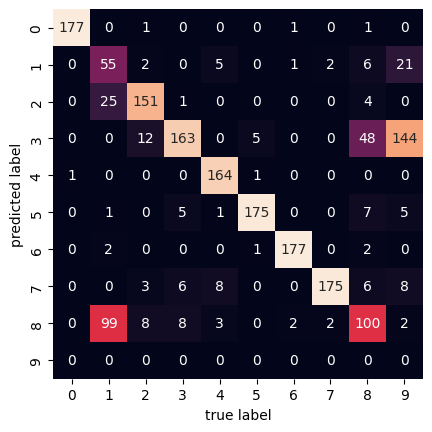

In [49]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

####**Case 2: Image Compression**

**Step 1 - Load Data**

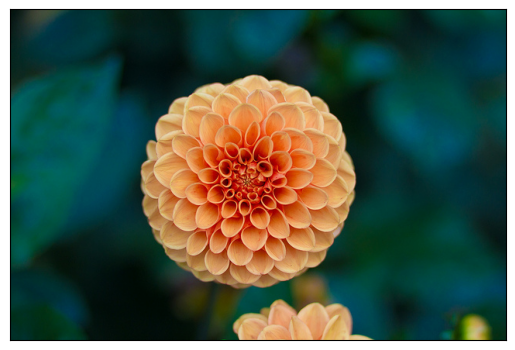

In [50]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

Check the image shape

In [51]:
flower.shape

# Result,
# (427, 640, 3)

(427, 640, 3)

**Step 2 - Normalize The Pixel Value**

In [52]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

**Step 3 - Plot The Pixel Distribution**

In [53]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

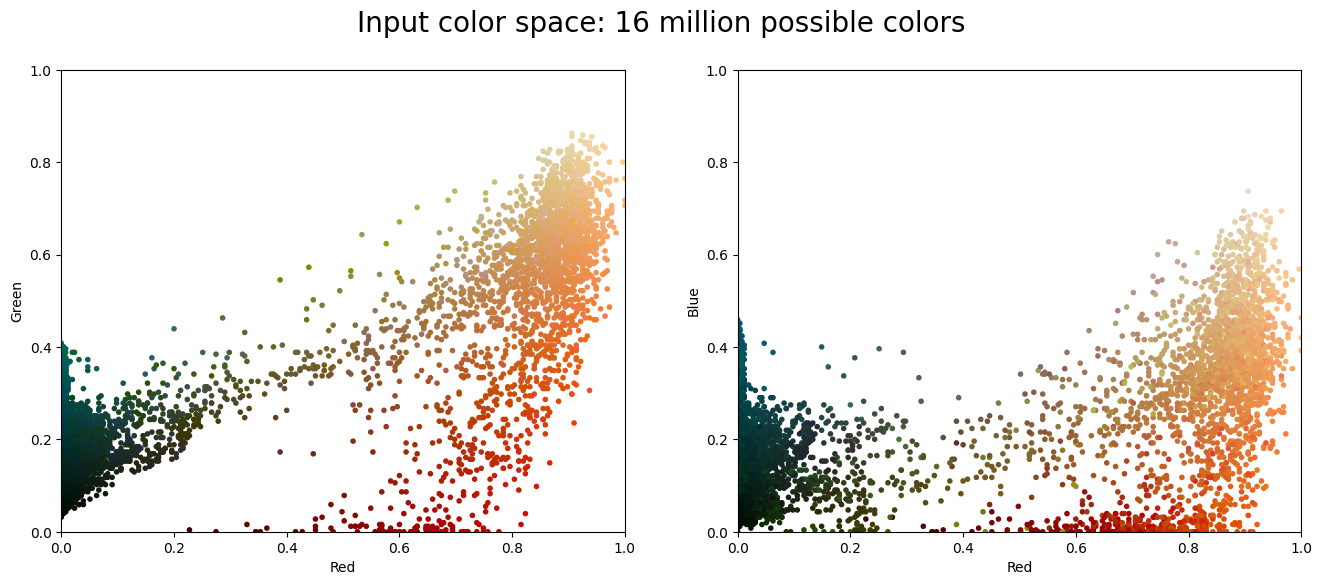

In [54]:
plot_pixels(data, title='Input color space: 16 million possible colors')

**Step 4 - Make K-Means Model**

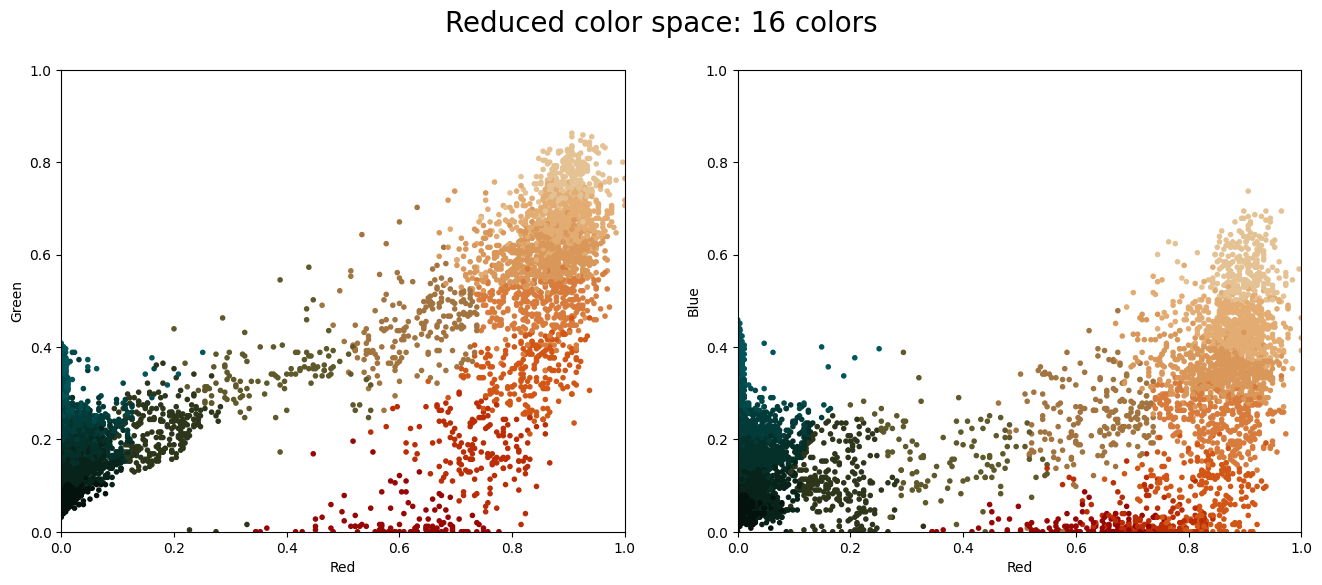

In [55]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

**Step 5 - Visualize The Result**

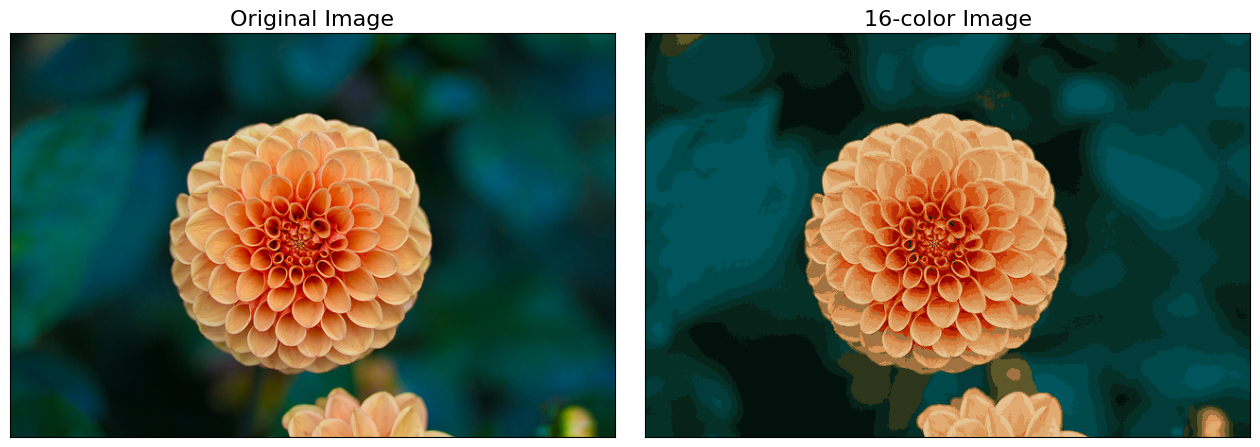

In [56]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

##**Lab Work 3**

-----

###**Self-Organizing Map (SOM)**

**Step 0 - Install Minisom**

In [57]:
pip install minisom

**Step 1 - Import Library**

In [58]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

**Step 2 - Load Iris Dataset**

In [59]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

**Step 3 - Normalize Data**

In [60]:
# Normalize Data
data = data / data.max(axis=0)

**Step 4 - Make SOM Model**

In [61]:
# Initiate SOM Model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Step 4.1 - Initiatie Random Weight for SOM

In [62]:
# Initiate random weight
som.random_weights_init(data)

Step 4.2 - Fit Model

In [63]:
# Fit SOM
num_epochs = 100
som.train_random(data, num_epochs)

**Step 5 - Visualize SOM Network**

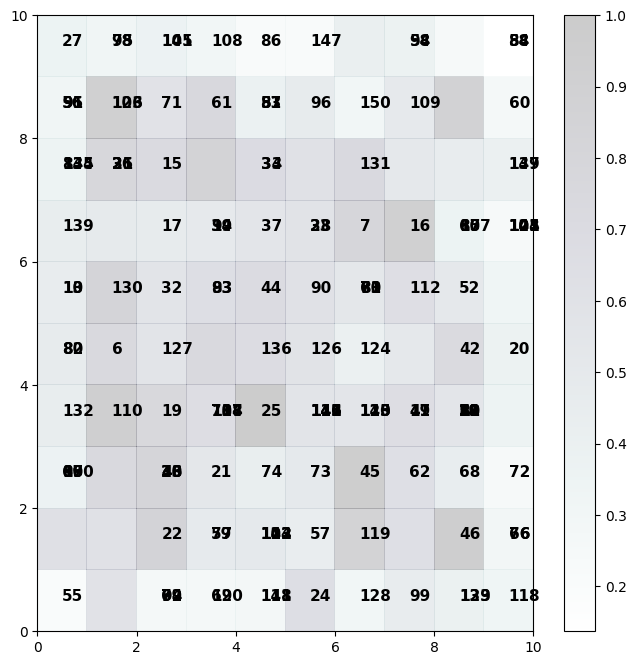

In [65]:
# SOM Visualization
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

##**Lab Assignment**

-----

**Import Library**

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from minisom import MiniSom

**Step 1: Load the Dataset**

In [80]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**Step 2: Preprocess the Data**

In [74]:
# Select relevant features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

**Step 3: Normalize the data**

In [81]:
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

**Step 4: Determine the Optimal Number of Clusters**

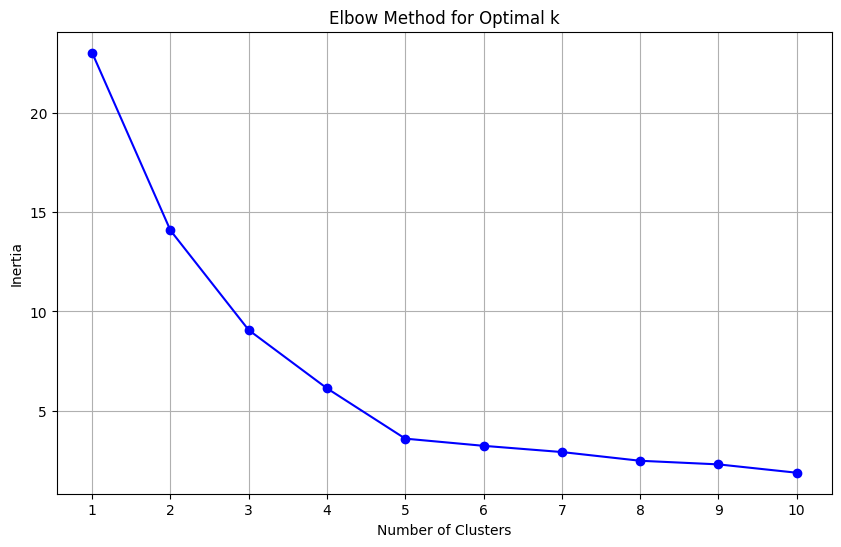

In [82]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid()
plt.show()

**Step 5: Create and Fit the K-Means Model**

In [84]:
optimal_k = 5  # Replace with the optimal number found from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(normalized_features)

# Add the cluster labels to the original data
data['KMeans_Cluster'] = kmeans.labels_

**Step 6: Initialize and train the SOM**

In [86]:
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(data=normalized_features, num_iteration=100)

**Step 7: Map each data point to the SOM node**

In [87]:
som_labels = [som.winner(row) for row in normalized_features]

**Step 8: Convert SOM node positions to unique clusters**

In [88]:
unique_nodes = {node: idx for idx, node in enumerate(set(som_labels))}
data['SOM_Cluster'] = [unique_nodes[node] for node in som_labels]

**Step 9: Visualize the results of K-Means clustering**

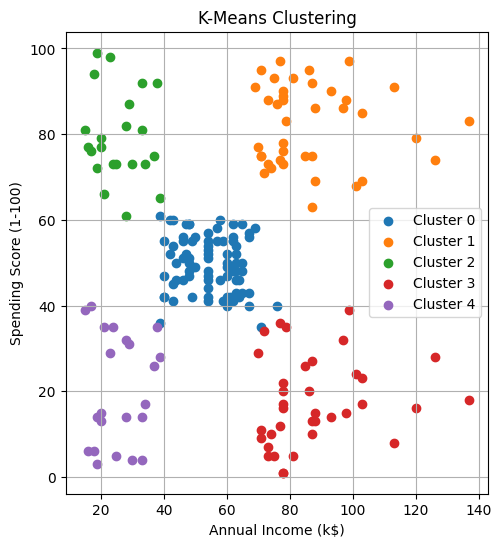

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cluster_id in range(optimal_k):
    cluster_points = data[data['KMeans_Cluster'] == cluster_id]
    plt.scatter(
        cluster_points['Annual Income (k$)'],
        cluster_points['Spending Score (1-100)'],
        label=f'Cluster {cluster_id}'
    )
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)

**Step 10: Visualize the results of SOM clustering**

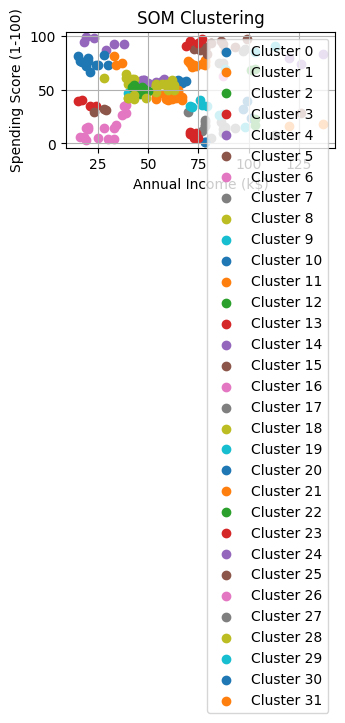

In [90]:
plt.subplot(1, 2, 2)
for cluster_id, node in unique_nodes.items():
    cluster_points = data[data['SOM_Cluster'] == node]
    plt.scatter(
        cluster_points['Annual Income (k$)'],
        cluster_points['Spending Score (1-100)'],
        label=f'Cluster {node}'
    )
plt.title('SOM Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()